In [1]:
import numpy as np
import random
from matplotlib import pyplot as plt
%matplotlib inline

In [42]:
N_POP = 200
N_GEN = 100

N_DIM = 100

F = 0.42
CR = 0.5

random_shift = 2*np.random.random((N_DIM))
print random_shift

[ 1.94855865  1.82040002  1.59939295  0.40033774  1.85900324  1.82208465
  0.3317298   0.56492306  0.95656101  1.97978137  0.71744064  0.94997683
  1.32720149  1.46292949  1.83314     1.41783171  1.85774843  1.01485469
  1.63372576  1.535826    1.85377092  1.98521843  1.72018716  0.8100604
  0.7593302   0.95878083  0.55962042  0.01103579  1.40848417  0.0368379
  1.04839963  0.75508622  1.60054268  0.05081234  1.96218766  1.34191765
  0.85900826  1.79092357  0.03984112  1.45283008  1.44548329  0.21511871
  0.13501587  1.55866236  1.88527843  1.48155128  0.14882172  1.87805851
  1.52101705  1.75704867  1.64574785  1.31909247  1.99340039  0.3551235
  1.1778326   1.96309993  0.49146139  1.17462776  1.00134545  1.49009882
  0.41628091  1.38932029  0.08847019  1.58308782  0.78369663  0.34220362
  0.07653209  0.72448414  0.9928777   0.88274199  0.39873737  1.26126808
  1.35086293  1.22806546  1.35628182  1.67407637  0.63361383  0.53853891
  0.08801088  1.63950876  0.4695146   0.04763766  1.23

In [43]:
def loss(x):
    n_dim = x.shape[0]
    
    # Sphere
    y = np.sum((random_shift + x)**2)
    return y


def generate_random_point(n_dim=N_DIM, lim=20):
    pt = (2*np.random.random((n_dim,))-1)*lim
    return pt

pop = [generate_random_point() for ix in range(N_POP)]
temp = []
losses = []

In [44]:
for gen in range(N_GEN):
    ord_pop = sorted(pop, key=lambda x: loss(x))
    
    best = ord_pop[0]
    print "Best loss:", loss(best)# , best
    losses.append(loss(best))
    
    #plt.figure(gen)
    #for ix in ord_pop:
    #    plt.scatter(ix[0], ix[1])
    #plt.scatter(best[0], best[1], color='green')
    #plt.scatter(-random_shift[0], -random_shift[1], color='red')
    
    for ix in range(N_POP):
        x = pop[ix]
        a, b, c = random.sample(pop, 3)
        while (list(a) == list(x)) or (list(b) == list(x)) or (list(c) == list(x)):
            a, b, c = random.sample(pop, 3)
        
        t = best + F*(x-c)
        # print t
        
        R = int(np.random.random() * N_DIM)
        y = np.copy(x)
        
        for j in range(N_DIM):
            if (np.random.random() < CR) or (j==R):
                y[j] = t[j]
            else:
                y[j] = x[j]
        
        if loss(y) < loss(x):
            pop[ix] = y
        else:
            pass
plt.show()

Best loss: 10411.0095203
Best loss: 8236.38826678
Best loss: 7907.82560285
Best loss: 7907.82560285
Best loss: 7082.35804579
Best loss: 6502.38802645
Best loss: 5322.53113558
Best loss: 5189.28919194
Best loss: 4087.41278901
Best loss: 3700.95764168
Best loss: 3456.50181569
Best loss: 2976.65606852
Best loss: 2846.6682988
Best loss: 2846.6682988
Best loss: 2667.26358792
Best loss: 2465.36270932
Best loss: 2242.87497373
Best loss: 2081.43491375
Best loss: 1956.69369202
Best loss: 1792.16190731
Best loss: 1702.29482382
Best loss: 1628.3142655
Best loss: 1538.01293799
Best loss: 1433.06610783
Best loss: 1402.12125247
Best loss: 1332.4844988
Best loss: 1289.21512956
Best loss: 1231.35591345
Best loss: 1184.7478005
Best loss: 1155.41288928
Best loss: 1105.50181581
Best loss: 1073.36071624
Best loss: 1044.70183274
Best loss: 1013.67881021
Best loss: 996.981380453
Best loss: 962.927762295
Best loss: 948.848966813
Best loss: 928.235628131
Best loss: 911.697151082
Best loss: 899.509222877
Best 

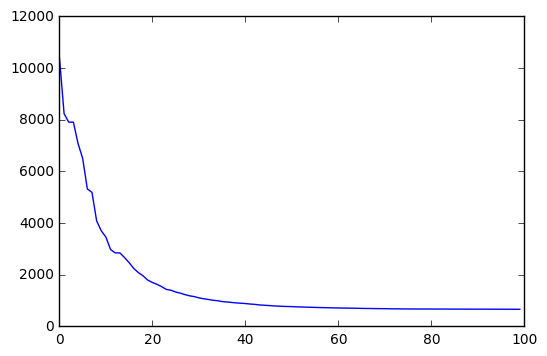

In [45]:
plt.plot(losses)
plt.show()